# TOR detection using NetTiSA flow 

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../final_datasets/tor_multiclass.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,10.152.152.11,216.58.216.142.,57361,443,1.437765e+09,1.437765e+09,AUDIO,828,0,...,862.836301,1.600780,0.466452,138.267585,296.423733,0.358433,0.000022,7.800456,1.649335,1.0
1,1,216.58.216.142,10.152.152.11.,443,57361,1.437765e+09,1.437765e+09,AUDIO,847,0,...,233.337173,10.427841,0.466245,138.206084,296.423644,0.350383,0.000007,7.800557,0.912530,1.0
2,2,173.194.33.97,10.152.152.11.,443,56254,1.437765e+09,1.437765e+09,AUDIO,871,0,...,336.903382,15.029340,0.375514,111.241935,296.239266,0.340505,0.000005,13.485507,1.098851,1.0
3,3,10.152.152.11,173.194.33.97.,56254,443,1.437765e+09,1.437765e+09,AUDIO,855,0,...,904.366274,1.333824,0.366058,108.201270,295.584786,0.346118,0.000018,13.522678,1.536300,1.0
4,4,74.125.28.189,10.152.152.11.,443,44097,1.437765e+09,1.437765e+09,AUDIO,81,0,...,405.689384,3.515484,0.277971,76.550766,275.391293,3.442391,0.000012,29.708890,1.350000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120791,120791,10.0.2.15,198.52.200.39.,55139,443,1.437768e+09,1.437768e+09,VOIP,12430,0,...,642.418813,10.034838,0.524006,157.189754,299.976789,0.024135,0.000015,0.132154,0.422882,1.0
120792,120792,10.0.2.15,198.52.200.39.,55139,443,1.437768e+09,1.437769e+09,VOIP,13031,0,...,649.522630,14.665233,0.500055,150.014497,299.995767,0.023023,0.000009,0.113963,0.269685,1.0
120793,120793,198.52.200.39,10.0.2.15.,443,55139,1.437768e+09,1.437769e+09,VOIP,16889,0,...,510.425780,4.202331,0.498071,149.420427,299.998091,0.017764,0.000005,0.113980,1.052108,1.0
120794,120794,10.0.2.15,198.52.200.39.,55139,443,1.437769e+09,1.437769e+09,VOIP,1074,0,...,658.293949,14.538439,0.511472,12.647428,24.727524,0.023045,0.000068,0.076411,0.255359,1.0


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


# for F in features:
#     df.replace([np.inf], 0, inplace=True)
#     df.replace([-np.inf], 0, inplace=True)
#     df.loc[df[F].isnull(), F] = 0

In [6]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,AUDIO,828,0,461864,0,617,602.693123,363240,-0.011730,60,1520,1460,97.681219,553,89.627229,862.836301,1.600780,0.466452,138.267585,296.423733,0.358433,0.000022,7.800456,1.649335,1.0,0
1,AUDIO,847,0,74678,0,148,180.360750,32531,0.098552,60,1520,1460,121.865371,123,83.108108,233.337173,10.427841,0.466245,138.206084,296.423644,0.350383,0.000007,7.800557,0.912530,1.0,0
2,AUDIO,871,0,108133,0,184,282.283545,79684,0.210781,60,1520,1460,153.414970,162,88.043478,336.903382,15.029340,0.375514,111.241935,296.239266,0.340505,0.000005,13.485507,1.098851,1.0,0
3,AUDIO,855,0,509135,0,655,623.441256,388679,-0.024685,60,1520,1460,95.181871,591,90.229008,904.366274,1.333824,0.366058,108.201270,295.584786,0.346118,0.000018,13.522678,1.536300,1.0,0
4,AUDIO,81,0,17268,0,273,301.791319,91078,0.050090,60,1056,996,110.546271,243,89.010989,405.689384,3.515484,0.277971,76.550766,275.391293,3.442391,0.000012,29.708890,1.350000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120791,VOIP,12430,0,6689717,0,598,234.249867,54873,-0.437068,60,1520,1460,39.172218,86,14.381271,642.418813,10.034838,0.524006,157.189754,299.976789,0.024135,0.000015,0.132154,0.422882,1.0,7
120792,VOIP,13031,0,7268310,0,617,200.604088,40242,-0.509288,60,1520,1460,32.512818,69,11.183144,649.522630,14.665233,0.500055,150.014497,299.995767,0.023023,0.000009,0.113963,0.269685,1.0,7
120793,VOIP,16889,0,3854617,0,288,421.268323,177467,0.187895,60,1480,1420,146.273723,332,115.277778,510.425780,4.202331,0.498071,149.420427,299.998091,0.017764,0.000005,0.113980,1.052108,1.0,7
120794,VOIP,1074,0,608083,0,626,203.177263,41281,-0.509930,60,1520,1460,32.456432,77,12.300319,658.293949,14.538439,0.511472,12.647428,24.727524,0.023045,0.000068,0.076411,0.255359,1.0,7


In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
0,AUDIO,0
3440,BROWSING,1
50987,CHAT,2
51590,FILE_TRANSFER,3
54940,MAIL,4
55395,P2P,5
114901,VIDEO,6
118281,VOIP,7


In [8]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['AUDIO', 'BROWSING', 'CHAT', 'FILE_TRANSFER', 'MAIL', 'P2P', 'VIDEO', 'VOIP']

In [9]:
df = df[["LABEL_code"] + features].copy()

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [11]:
df.shape

(117746, 25)

In [12]:
df_validation = df.sample(n = 20000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
X = df[features]
y = df.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
y_train.value_counts()

5.0    40178
1.0    33294
0.0     2487
3.0     2390
6.0     2378
7.0      895
2.0      456
4.0      344
Name: LABEL_code, dtype: int64

In [16]:
y_test.value_counts()

5.0    17220
1.0    14269
0.0     1066
3.0     1024
6.0     1020
7.0      383
2.0      195
4.0      147
Name: LABEL_code, dtype: int64

In [17]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,200,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 2),
        'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [18]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [1:24:18<00:00, 50.59s/trial, best loss: -0.7025560476367942]
The best hyperparameters are :  

{'colsample_bytree': 0.883921273896384, 'eta': 0.3, 'gamma': 1.2038038420930794, 'max_depth': 10.0, 'min_child_weight': 2.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.600635755511067}


In [19]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

               precision    recall  f1-score   support

        AUDIO     0.8379    0.7420    0.7871      1066
     BROWSING     0.9292    0.9673    0.9478     14269
         CHAT     0.7500    0.2769    0.4045       195
FILE_TRANSFER     0.9803    0.9238    0.9512      1024
         MAIL     0.7857    0.4490    0.5714       147
          P2P     0.9657    0.9856    0.9755     17220
        VIDEO     0.7032    0.4275    0.5317      1020
         VOIP     0.7333    0.4021    0.5194       383

     accuracy                         0.9405     35324
    macro avg     0.8357    0.6468    0.7111     35324
 weighted avg     0.9355    0.9405    0.9354     35324



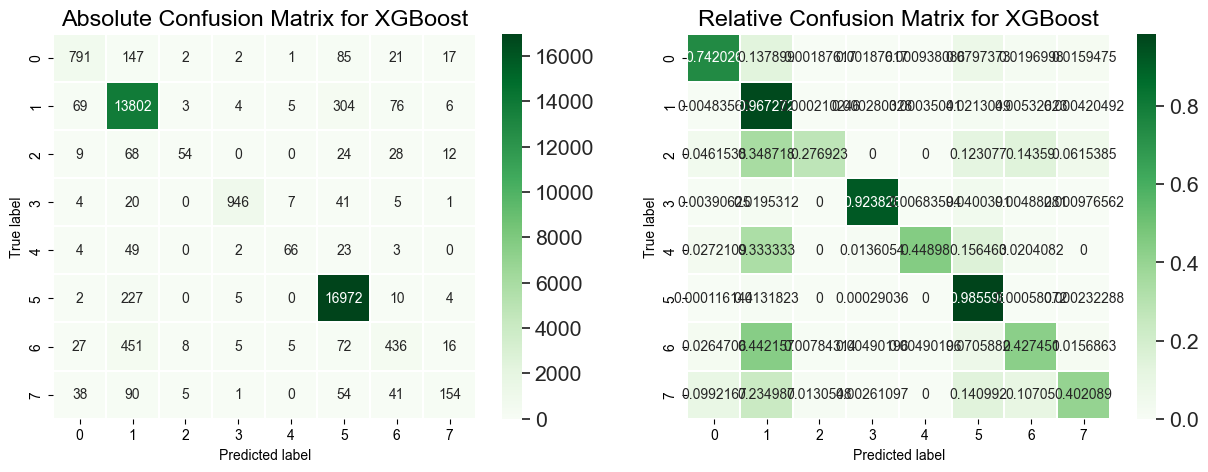

In [20]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [34]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    for i in range(cycles):
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='weighted')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [35]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=10)


               precision    recall  f1-score   support

        AUDIO     0.8106    0.6900    0.7454       887
     BROWSING     0.9257    0.9660    0.9454     11810
         CHAT     0.6531    0.1988    0.3048       161
FILE_TRANSFER     0.9803    0.9386    0.9590       847
         MAIL     0.8333    0.4622    0.5946       119
          P2P     0.9630    0.9833    0.9730     14334
        VIDEO     0.7411    0.4181    0.5346       849
         VOIP     0.6225    0.4006    0.4875       317

     accuracy                         0.9370     29324
    macro avg     0.8162    0.6322    0.6930     29324
 weighted avg     0.9315    0.9370    0.9315     29324



               precision    recall  f1-score   support

        AUDIO     0.9168    0.8677    0.8916       597
     BROWSING     0.9521    0.9808    0.9663      8195
         CHAT     0.9403    0.5526    0.6961       114
FILE_TRANSFER     0.9826    0.9577    0.9700       591
         MAIL     0.9692    0.6702    0.7925        94
          P2P     0.9812    0.9920    0.9866      9619
        VIDEO     0.8579    0.5855    0.6960       567
         VOIP     0.8671    0.6726    0.7576       223

     accuracy                         0.9636     20000
    macro avg     0.9334    0.7849    0.8446     20000
 weighted avg     0.9623    0.9636    0.9616     20000



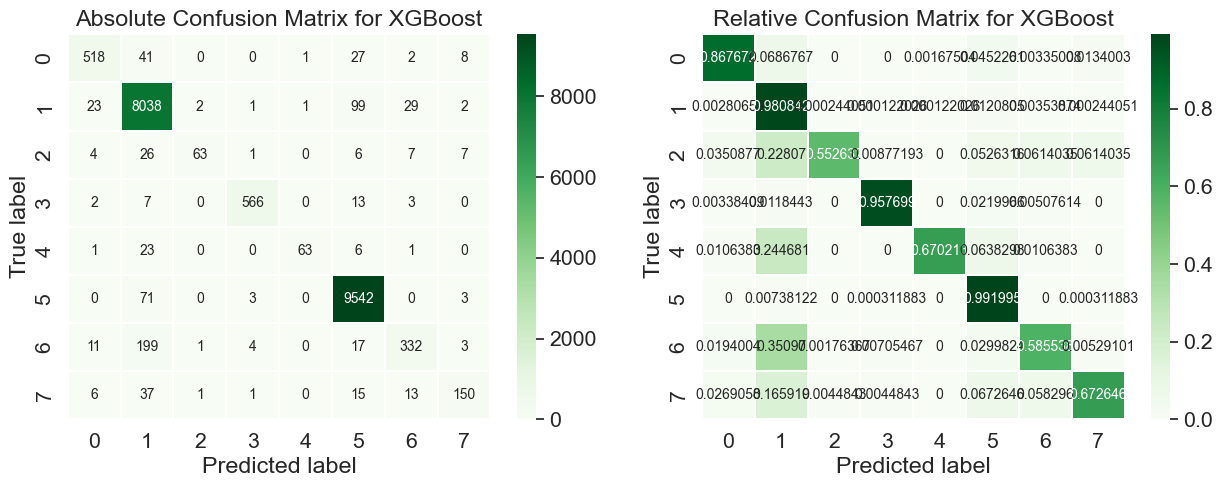

In [26]:
X_test=df_validation[features]  # Features
y_test=df_validation['LABEL_code']  # Labels

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

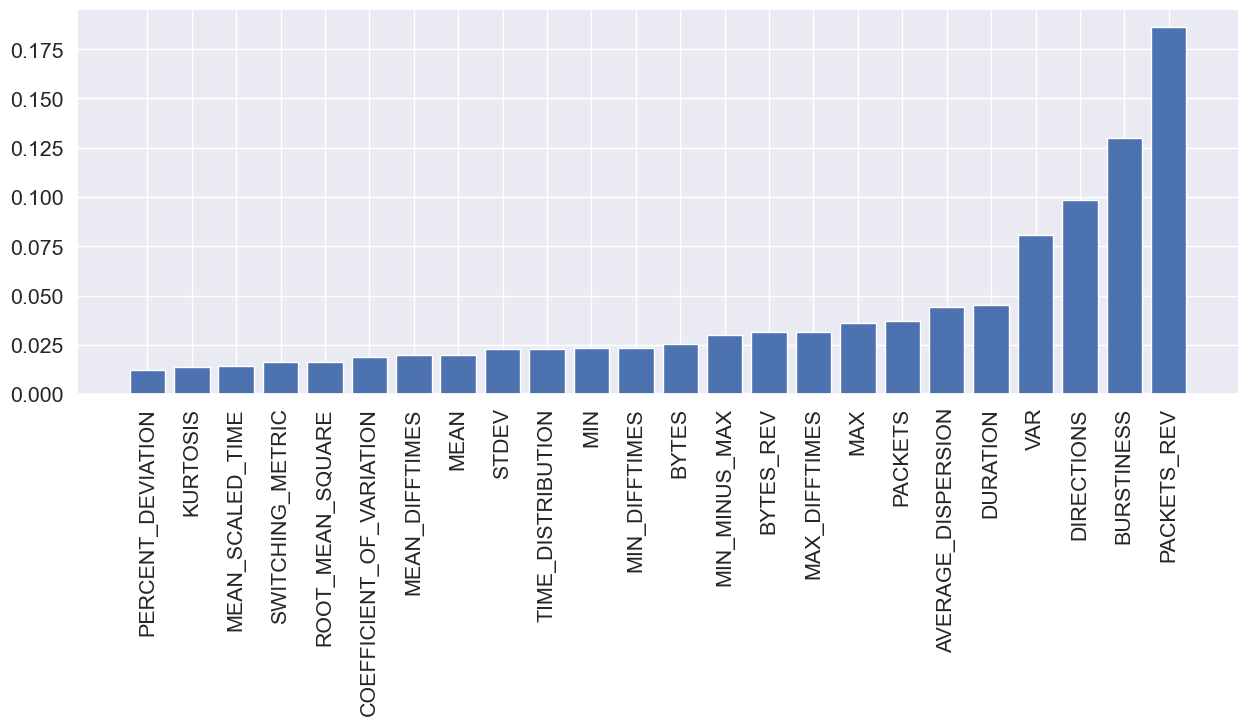

In [24]:
feat_importances = pd.Series(model.feature_importances_, index = X_test.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [25]:
feat_importances.to_dict()

{'PERCENT_DEVIATION': 0.012341832742094994,
 'KURTOSIS': 0.01394607126712799,
 'MEAN_SCALED_TIME': 0.01420278288424015,
 'SWITCHING_METRIC': 0.016067413613200188,
 'ROOT_MEAN_SQUARE': 0.016251711174845695,
 'COEFFICIENT_OF_VARIATION': 0.018675561994314194,
 'MEAN_DIFFTIMES': 0.019769659265875816,
 'MEAN': 0.020028218626976013,
 'STDEV': 0.022906199097633362,
 'TIME_DISTRIBUTION': 0.02294369786977768,
 'MIN': 0.02342607080936432,
 'MIN_DIFFTIMES': 0.023525642231106758,
 'BYTES': 0.02549724094569683,
 'MIN_MINUS_MAX': 0.02986898459494114,
 'BYTES_REV': 0.03145819157361984,
 'MAX_DIFFTIMES': 0.03169998899102211,
 'MAX': 0.03581073507666588,
 'PACKETS': 0.03707310929894447,
 'AVERAGE_DISPERSION': 0.044284187257289886,
 'DURATION': 0.0453401617705822,
 'VAR': 0.08052796125411987,
 'DIRECTIONS': 0.09846227616071701,
 'BURSTINESS': 0.1298695057630539,
 'PACKETS_REV': 0.1860227882862091}